<a href="https://colab.research.google.com/github/AtikaOktavianti/AtikaOktavianti/blob/main/Association_Rules_(my_movie).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Studi Kasus: Assosiation Rules menggunakan dataset my_movie.csv**

##Import Library

In [ ]:
# Library umum
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk association rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

##Load Dataset

In [ ]:
# Membaca file CSV
df = pd.read_csv('my_movies.csv')

# Menampilkan 5 baris pertama
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


##Preprocessing Data

**Mengecek Duplikat**

In [ ]:
# Cek Duplikat
df.duplicated().sum()

np.int64(3)

In [ ]:
# Hapus duplikat
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Mendapatkan daftar variabel kategorikal
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Variabel kategorikal:")
print(object_cols)

Variabel kategorikal:
['V1', 'V2', 'V3', 'V4', 'V5']


In [ ]:
# Mengambil kolom numerik dari kolom ke-5 sampai ke-14
num_movie = df.iloc[:, 5:15]

# Menampilkan 5 baris pertama dari data numerik
num_movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0


##Modelling

**1. Algoritma Apriori**

In [ ]:
# Mencari itemset yang sering muncul menggunakan algoritma Apriori
frequent_itemsets_ap = apriori(num_movie, min_support=0.15, use_colnames=True, verbose=1)

# Menampilkan 5 itemset teratas
print(frequent_itemsets_ap.head())

Processing 21 combinations | Sampling itemset size 3
    support         itemsets
0  0.428571    (Sixth Sense)
1  0.571429      (Gladiator)
2  0.285714          (LOTR1)
3  0.285714  (Harry Potter1)
4  0.428571        (Patriot)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


sekitar 57% dari semua transaksi (penonton atau pengguna) menyukai atau menonton film Gladiator.

In [ ]:
# Menampilkan jumlah itemset yang ditemukan setelah diurutkan berdasarkan support tertinggi
frequent_itemsets_ap.sort_values("support", ascending=False).shape

(11, 2)

terdapat 11 itemset yang ditemukan, masing-masing memiliki 2 kolom

In [ ]:
# Membuat aturan asosiasi menggunakan metrik "confidence" dengan threshold minimal 0.1
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)

# Menampilkan 5 aturan asosiasi pertama
print(rules_ap.head())

     antecedents    consequents  antecedent support  consequent support  \
0  (Sixth Sense)    (Gladiator)            0.428571            0.571429   
1    (Gladiator)  (Sixth Sense)            0.571429            0.428571   
2  (Sixth Sense)   (Green Mile)            0.428571            0.285714   
3   (Green Mile)  (Sixth Sense)            0.285714            0.428571   
4      (Patriot)    (Gladiator)            0.428571            0.571429   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.285714    0.666667  1.166667               1.0  0.040816    1.285714   
1  0.285714    0.500000  1.166667               1.0  0.040816    1.142857   
2  0.285714    0.666667  2.333333               1.0  0.163265    2.142857   
3  0.285714    1.000000  2.333333               1.0  0.163265         inf   
4  0.428571    1.000000  1.750000               1.0  0.183673         inf   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.250000  0.400000   0.222

In [ ]:
# Menjalankan Apriori dengan min_support lebih rendah dan batasan panjang itemset (max_len) yang lebih besar
frequent_itemsets_ap = apriori(num_movie, min_support=0.05, max_len=3, use_colnames=True, verbose=1)

# Menambahkan kolom baru 'lhs items' untuk menghitung jumlah item pada antecedent
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)

# Menambahkan kolom 'lhs items' yang menunjukkan jumlah item dalam antecedent
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x: len(x))

# Menyaring aturan yang memiliki lebih dari 1 item pada antecedent dan mengurutkan berdasarkan lift
filtered_rules_ap = rules_ap[rules_ap['lhs items'] > 1].sort_values('lift', ascending=False)

# Menampilkan 5 aturan pertama setelah disaring
print(filtered_rules_ap.head())

Processing 174 combinations | Sampling itemset size 3
                      antecedents consequents  antecedent support  \
108       (Gladiator, Green Mile)      (LOTR)            0.142857   
48       (Sixth Sense, Gladiator)      (LOTR)            0.285714   
59   (Sixth Sense, Harry Potter1)     (LOTR1)            0.142857   
66           (Sixth Sense, LOTR1)     (LOTR2)            0.142857   
64           (LOTR2, Sixth Sense)     (LOTR1)            0.142857   

     consequent support   support  confidence  lift  representativity  \
108            0.142857  0.142857         1.0   7.0               1.0   
48             0.142857  0.142857         0.5   3.5               1.0   
59             0.285714  0.142857         1.0   3.5               1.0   
66             0.285714  0.142857         1.0   3.5               1.0   
64             0.285714  0.142857         1.0   3.5               1.0   

     leverage  conviction  zhangs_metric  jaccard  certainty  kulczynski  \
108  0.122449   

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


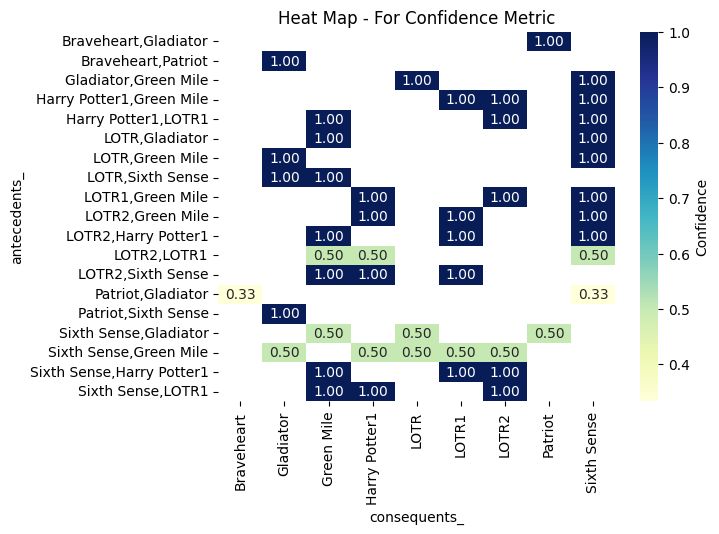

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menambahkan kolom 'antecedents_' dan 'consequents_' untuk mempermudah visualisasi
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))

# Membuat pivot table dari DataFrame rules dengan antecedents_ sebagai index, consequents_ sebagai columns,
# dan menggunakan confidence sebagai nilai
pivot = rules_ap[rules_ap['lhs items'] > 1].pivot(index='antecedents_',
                                                   columns='consequents_',
                                                   values='confidence')

# Menghasilkan heatmap dengan anotasi untuk nilai confidence
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Confidence'})
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Menampilkan heatmap
plt.show()

**2. Algoritma FP-Growth**

In [ ]:
!pip install mlxtend
from mlxtend.frequent_patterns import fpgrowth # Import the fpgrowth function

In [ ]:
# Menjalankan FP-Growth dengan min_support 0.1 untuk menemukan frequent itemsets
frequent_itemsets_fp = fpgrowth(num_movie, min_support=0.1, use_colnames=True, verbose=1)

# Menampilkan bentuk (shape) dari frequent itemsets yang ditemukan
print(frequent_itemsets_fp.shape)

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR1)
7 itemset(s) from tree conditioned on items (LOTR2)
15 itemset(s) from tree conditioned on items (Harry Potter1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)
(53, 2)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Mengurutkan frequent itemsets berdasarkan support tertinggi dan menampilkan 5 teratas
frequent_itemsets_fp_sorted = frequent_itemsets_fp.sort_values("support", ascending=False)
print(frequent_itemsets_fp_sorted.head())

     support              itemsets
5   0.571429           (Gladiator)
6   0.428571             (Patriot)
0   0.428571         (Sixth Sense)
41  0.428571  (Patriot, Gladiator)
1   0.285714          (Green Mile)


In [ ]:
# Menghasilkan aturan asosiasi dari itemset FP-Growth dengan minimum confidence 0.8
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)

# Menampilkan 5 aturan asosiasi pertama
print(rules_fp.head())

               antecedents    consequents  antecedent support  \
0   (Patriot, Sixth Sense)    (Gladiator)            0.142857   
1             (Green Mile)  (Sixth Sense)            0.285714   
2  (Gladiator, Green Mile)  (Sixth Sense)            0.142857   
3     (Sixth Sense, LOTR1)   (Green Mile)            0.142857   
4      (LOTR1, Green Mile)  (Sixth Sense)            0.142857   

   consequent support   support  confidence      lift  representativity  \
0            0.571429  0.142857         1.0  1.750000               1.0   
1            0.428571  0.285714         1.0  2.333333               1.0   
2            0.428571  0.142857         1.0  2.333333               1.0   
3            0.285714  0.142857         1.0  3.500000               1.0   
4            0.428571  0.142857         1.0  2.333333               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.061224         inf       0.500000  0.250000        1.0    0.625000  
1  0.16326

In [ ]:
# Menyaring aturan dengan support > 0.1 dan confidence > 0.4
filtered_rules_fp = rules_fp[(rules_fp['support'] > 0.1) & (rules_fp['confidence'] > 0.4)]

# Mengurutkan berdasarkan confidence secara menurun dan menampilkan jumlah baris dan kolom
print(filtered_rules_fp.sort_values("confidence", ascending=False).shape)

(125, 14)


In [ ]:
# Menambahkan kolom 'lhs items' yang menunjukkan jumlah item dalam antecedents
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x: len(x))

# Menyaring aturan yang memiliki lebih dari 1 item dalam antecedents dan mengurutkan berdasarkan lift tertinggi
multi_lhs_rules_fp = rules_fp[rules_fp['lhs items'] > 1].sort_values('lift', ascending=False)

# Menampilkan 5 aturan teratas
print(multi_lhs_rules_fp.head())

               antecedents             consequents  antecedent support  \
42     (LOTR2, Green Mile)  (Harry Potter1, LOTR1)            0.142857   
41  (LOTR2, Harry Potter1)     (LOTR1, Green Mile)            0.142857   
20     (LOTR1, Green Mile)    (LOTR2, Sixth Sense)            0.142857   
19    (Sixth Sense, LOTR1)     (LOTR2, Green Mile)            0.142857   
18     (LOTR2, Green Mile)    (Sixth Sense, LOTR1)            0.142857   

    consequent support   support  confidence  lift  representativity  \
42            0.142857  0.142857         1.0   7.0               1.0   
41            0.142857  0.142857         1.0   7.0               1.0   
20            0.142857  0.142857         1.0   7.0               1.0   
19            0.142857  0.142857         1.0   7.0               1.0   
18            0.142857  0.142857         1.0   7.0               1.0   

    leverage  conviction  zhangs_metric  jaccard  certainty  kulczynski  \
42  0.122449         inf            1.0      1.

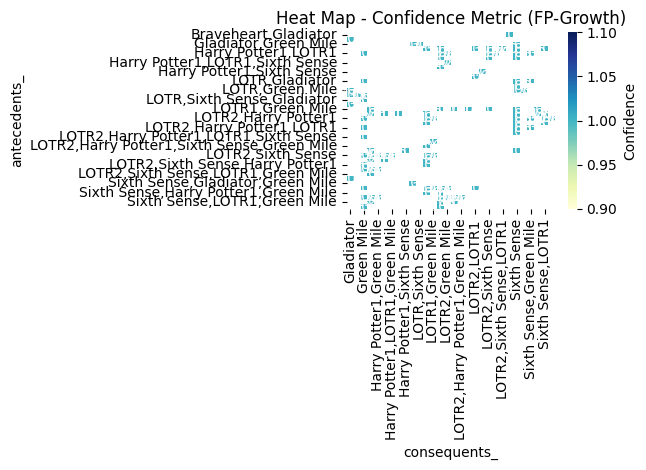

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menambahkan kolom teks untuk antecedents dan consequents agar mudah divisualisasikan
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))

# Membuat pivot table untuk visualisasi heatmap berdasarkan confidence
pivot = rules_fp[rules_fp['lhs items'] > 1].pivot(index='antecedents_',
                                                  columns='consequents_',
                                                  values='confidence')

# Menghasilkan heatmap dengan anotasi
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': 'Confidence'})
plt.title('Heat Map - Confidence Metric (FP-Growth)')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()

**3. Algoritma Eclat**

In [ ]:
from itertools import combinations
from collections import defaultdict

def eclat(df, min_support=0.1):
    # Menyimpan hasil frequent itemsets
    itemsets = defaultdict(int)

    # Membuat dictionary yang memetakan item ke transaksi yang mengandung item tersebut
    item_to_transactions = defaultdict(set)
    for transaction_id, row in df.iterrows():
        for item in df.columns:
            # Check if the value is 1 (or True), not just any numerical value
            if row[item] == 1:
                item_to_transactions[item].add(transaction_id)

    # Fungsi untuk menggabungkan itemsets
    def find_frequent_itemsets(itemsets, item_to_transactions, min_support):
        # Menyimpan itemsets yang memenuhi syarat support
        frequent_itemsets = {}
        for itemset, transactions in itemsets.items():
            support = len(transactions) / len(df)
            if support >= min_support:
                frequent_itemsets[itemset] = support
        return frequent_itemsets

    # Itemsets ukuran 1 (single items)
    single_itemsets = {frozenset([item]): transactions for item, transactions in item_to_transactions.items()}
    frequent_itemsets = find_frequent_itemsets(single_itemsets, item_to_transactions, min_support)

    # Mencari itemsets lebih besar
    k = 2
    while len(frequent_itemsets) > 0:
        candidate_itemsets = defaultdict(set)
        # Iterate through the keys (itemsets) and their corresponding transaction sets
        for itemset1, support1 in frequent_itemsets.items():
            transactions1 = item_to_transactions[tuple(itemset1)[0]]
            for itemset2, support2 in frequent_itemsets.items():
                transactions2 = item_to_transactions[tuple(itemset2)[0]]

                if len(itemset1.intersection(itemset2)) == k - 2:
                    # Ensure transactions1 and transactions2 are sets before intersection
                    candidate_itemsets[itemset1.union(itemset2)] = transactions1.intersection(transactions2)

        frequent_itemsets = find_frequent_itemsets(candidate_itemsets, item_to_transactions, min_support)
        itemsets.update(frequent_itemsets)
        k += 1

    return itemsets

# Menjalankan algoritma Eclat dengan minimum support 0.1
frequent_itemsets_eclat = eclat(df.iloc[:, 5:15], min_support=0.1) # Using only the relevant columns

# Menampilkan frequent itemsets yang ditemukan
print(frequent_itemsets_eclat)

defaultdict(<class 'int'>, {frozenset({'Sixth Sense', 'LOTR1'}): 0.14285714285714285, frozenset({'Sixth Sense', 'Harry Potter1'}): 0.14285714285714285, frozenset({'LOTR2', 'Sixth Sense'}): 0.14285714285714285, frozenset({'Sixth Sense', 'Green Mile'}): 0.2857142857142857, frozenset({'Sixth Sense', 'Gladiator'}): 0.2857142857142857, frozenset({'Patriot', 'Sixth Sense'}): 0.14285714285714285, frozenset({'LOTR', 'Sixth Sense'}): 0.14285714285714285, frozenset({'Harry Potter1', 'LOTR1'}): 0.14285714285714285, frozenset({'LOTR2', 'LOTR1'}): 0.2857142857142857, frozenset({'LOTR1', 'Green Mile'}): 0.14285714285714285, frozenset({'LOTR2', 'Harry Potter1'}): 0.14285714285714285, frozenset({'Harry Potter1', 'Green Mile'}): 0.14285714285714285, frozenset({'Harry Potter2', 'Harry Potter1'}): 0.14285714285714285, frozenset({'LOTR2', 'Green Mile'}): 0.14285714285714285, frozenset({'Gladiator', 'Green Mile'}): 0.14285714285714285, frozenset({'LOTR', 'Green Mile'}): 0.14285714285714285, frozenset({'Pat

In [ ]:
from itertools import combinations
from collections import defaultdict
from itertools import chain # This line should be indented

def eclat(df, min_support=0.1):
    # Menyimpan hasil frequent itemsets
    itemsets = defaultdict(int)

    # Membuat dictionary yang memetakan item ke transaksi yang mengandung item tersebut
    item_to_transactions = defaultdict(set)
    for transaction_id, row in df.iterrows():
        for item in df.columns:
            # Check if the value is 1 (or True), not just any numerical value
            if row[item] == 1:
                item_to_transactions[item].add(transaction_id)

    # Fungsi untuk menggabungkan itemsets
    def find_frequent_itemsets(itemsets, item_to_transactions, min_support):
        # Menyimpan itemsets yang memenuhi syarat support
        frequent_itemsets = {}
        for itemset, transactions in itemsets.items():
            support = len(transactions) / len(df)
            if support >= min_support:
                frequent_itemsets[itemset] = support
        return frequent_itemsets

    # Itemsets ukuran 1 (single items)
    single_itemsets = {frozenset([item]): transactions for item, transactions in item_to_transactions.items()}
    frequent_itemsets = find_frequent_itemsets(single_itemsets, item_to_transactions, min_support)

    # Mencari itemsets lebih besar
    k = 2
    while len(frequent_itemsets) > 0:
        candidate_itemsets = defaultdict(set)
        # Iterate through the keys (itemsets) and their corresponding transaction sets
        for itemset1, support1 in frequent_itemsets.items():
            transactions1 = item_to_transactions[tuple(itemset1)[0]]
            for itemset2, support2 in frequent_itemsets.items():
                transactions2 = item_to_transactions[tuple(itemset2)[0]]

                if len(itemset1.intersection(itemset2)) == k - 2:
                    # Ensure transactions1 and transactions2 are sets before intersection
                    candidate_itemsets[itemset1.union(itemset2)] = transactions1.intersection(transactions2)

        frequent_itemsets = find_frequent_itemsets(candidate_itemsets, item_to_transactions, min_support)
        itemsets.update(frequent_itemsets)
        k += 1

    return itemsets, item_to_transactions # Return item_to_transactions as well


# Fungsi untuk menghitung confidence
def calculate_confidence(antecedent, consequent, frequent_itemsets, item_to_transactions):
    # Get transactions containing the antecedent
    antecedent_transactions = item_to_transactions.get(tuple(antecedent)[0], set())  # Handle potential KeyError

    # If the antecedent is not found, return 0 confidence
    if not antecedent_transactions:
        return 0

    consequent_transactions = item_to_transactions.get(tuple(consequent)[0], set()) # Handle potential KeyError
    intersection_transactions = antecedent_transactions.intersection(consequent_transactions)
    confidence = len(intersection_transactions) / len(antecedent_transactions)
    return confidence

# Fungsi untuk menghasilkan association rules
def generate_association_rules(frequent_itemsets, item_to_transactions, min_confidence=0.8, df=df): # Pass df to the function
    rules = []
    for itemset, support in frequent_itemsets.items(): # Change transactions to support
        if len(itemset) > 1:
            for antecedent in chain.from_iterable(combinations(itemset, r) for r in range(1, len(itemset))):
                antecedent = frozenset(antecedent)
                consequent = itemset.difference(antecedent)
                confidence = calculate_confidence(antecedent, consequent, frequent_itemsets, item_to_transactions)
                if confidence >= min_confidence:
                    rule = {
                        'antecedent': antecedent,
                        'consequent': consequent,
                        'support': support, # Use support directly instead of len(transactions) / len(df)
                        'confidence': confidence
                    }
                    rules.append(rule)
    return pd.DataFrame(rules)

# Menjalankan algoritma Eclat dengan minimum support 0.1
frequent_itemsets_eclat, item_to_transactions = eclat(df.iloc[:, 5:15], min_support=0.1)  # Get item_to_transactions from eclat

# Menjalankan fungsi untuk menghasilkan association rules
rules_eclat = generate_association_rules(frequent_itemsets_eclat, item_to_transactions, min_confidence=0.8)

# Menampilkan 5 aturan asosiasi pertama
print(rules_eclat.head())

        antecedent       consequent   support  confidence
0     (Green Mile)    (Sixth Sense)  0.285714         1.0
1           (LOTR)    (Sixth Sense)  0.142857         1.0
2          (LOTR2)          (LOTR1)  0.285714         1.0
3          (LOTR1)          (LOTR2)  0.285714         1.0
4  (Harry Potter2)  (Harry Potter1)  0.142857         1.0


<ipython-input-38-5a6432099ab1>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


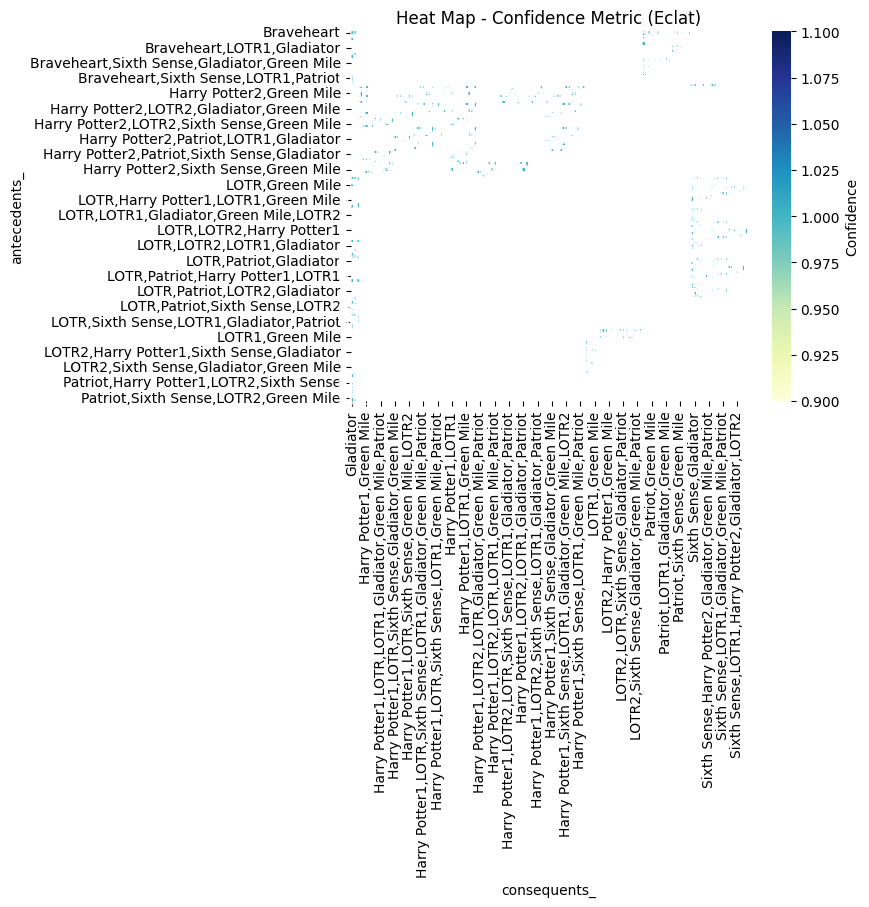

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menambahkan kolom teks untuk antecedents dan consequents agar mudah divisualisasikan
rules_eclat['antecedents_'] = rules_eclat['antecedent'].apply(lambda a: ','.join(list(a)))
rules_eclat['consequents_'] = rules_eclat['consequent'].apply(lambda a: ','.join(list(a)))

# Membuat pivot table untuk visualisasi heatmap berdasarkan confidence
pivot = rules_eclat[rules_eclat['antecedents_'].notna() & rules_eclat['consequents_'].notna()]
pivot = pivot.pivot(index='antecedents_',
                    columns='consequents_',
                    values='confidence')

# Menghasilkan heatmap dengan anotasi
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': 'Confidence'})
plt.title('Heat Map - Confidence Metric (Eclat)')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
import numpy as np

# Fungsi evaluasi untuk association rules (Apriori dan FP-Growth)
def evaluate_rules(rules, algo_name):
    print(f"Evaluasi untuk {algo_name}")
    print(f"Jumlah Rules: {rules.shape[0]}")
    print(f"Rata-rata Support: {rules['support'].mean():.4f}")
    print(f"Rata-rata Confidence: {rules['confidence'].mean():.4f}")
    print(f"Rata-rata Lift: {rules['lift'].mean():.4f}")
    print("="*50)

# Fungsi evaluasi untuk Eclat
def evaluate_eclat(frequent_itemsets_eclat):
    print("Evaluasi untuk Eclat")
    print(f"Jumlah Pairs: {len(frequent_itemsets_eclat)}")
    print(f"Rata-rata Support: {np.mean(list(frequent_itemsets_eclat.values())):.4f}")
    print("="*50)

# Evaluasi Apriori
evaluate_rules(rules_ap, "Apriori")

# Evaluasi FP-Growth
evaluate_rules(rules_fp, "FP-Growth")

# Evaluasi Eclat
evaluate_eclat(frequent_itemsets_eclat)

Evaluasi untuk Apriori
Jumlah Rules: 107
Rata-rata Support: 0.1562
Rata-rata Confidence: 0.7344
Rata-rata Lift: 2.7204
Evaluasi untuk FP-Growth
Jumlah Rules: 125
Rata-rata Support: 0.1486
Rata-rata Confidence: 1.0000
Rata-rata Lift: 4.3867
Evaluasi untuk Eclat
Jumlah Pairs: 137
Rata-rata Support: 0.2555
